# PHYS3070: Negatively buoyant ball (Non-dimensional)

Romain Beucher and Louis Moresi

Imagine a tank of thick, viscous fluid (like syrup, for example). This turns out to be a reasonable model for the
interior of a solid (rocky / icy) planet if we consider the evolution on a geological timescale. A cold / dense
blob of material sinks and stirs a tank of fluid just like this computer model shows.

## Import python tools

In [1]:
%matplotlib notebook
import UWGeodynamics as GEO
import glucifer

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


# Geometry

In [2]:
Model = GEO.Model(elementRes=(64, 64), minCoord=(-0.5, -0.5), maxCoord=(0.5, 0.5))

## Materials

The tank is filled with a viscous fluid (`background_fluid`).
A ball of colder / denser material (`ball`) is placed in the fluid 30 cm above the center of the tank (20cm from the top of the box.). The ball diameter is chosen to be 20cm.

In [3]:
background_fluid = Model.add_material(name="Background", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))

Disk = GEO.shapes.Disk(center=(0.,0.3), radius=0.1)
ball = Model.add_material(name="Ball", shape=Disk)


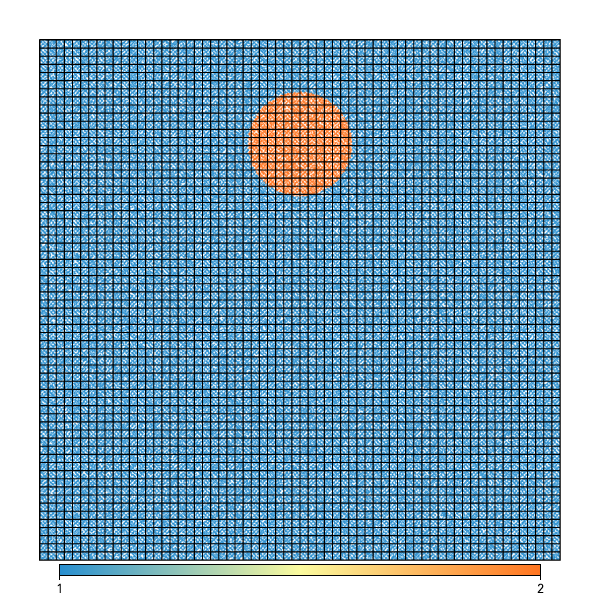

In [4]:
Fig1 = glucifer.Figure(figsize=(600,600))
Fig1.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig1.Mesh(Model.mesh)
Fig1.show()

### Material properties

In [5]:
background_fluid.density = 1.0
background_fluid.viscosity = 1.0

ball.viscosity = 1.0
ball.density = 500.0


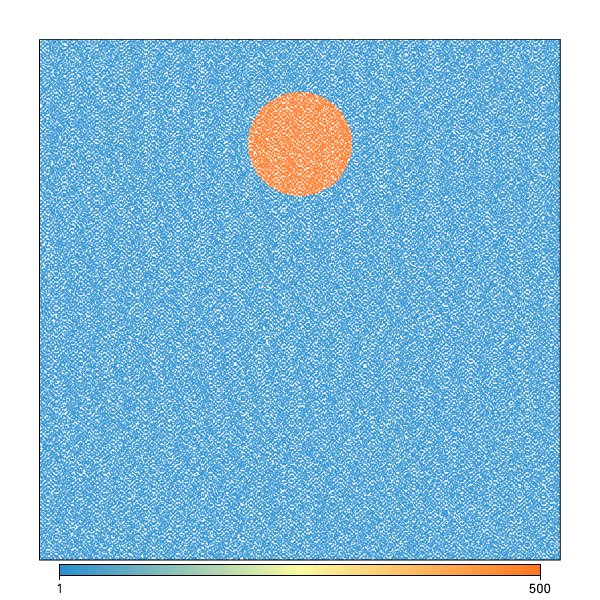

In [6]:
Fig = glucifer.Figure(figsize=(600,600))
Fig.Points(Model.swarm, Model.densityField, fn_size=2.0, title="Density Field")
Fig.save("Figure_2.png")
Fig.show()

## Define Boundary Conditions

The boundary conditions are freeslip everywhere (zero shear stress).

In [7]:
Model.set_velocityBCs(left=[0, None], right=[0,None], top=[None, 0.], bottom=[None, 0])

## Passive Tracers

In [8]:
import numpy as np

angles = np.arange(0., 360)
x = Disk.radius * np.cos(np.radians(angles)) 
y = Disk.radius * np.sin(np.radians(angles)) + 0.3

ball_contour = Model.add_passive_tracers(name="ball_contour", vertices=[x, y])

x0, y0 = 0, 0.2
tipTracker = Model.add_passive_tracers(name="tip", vertices=[x0, y0])


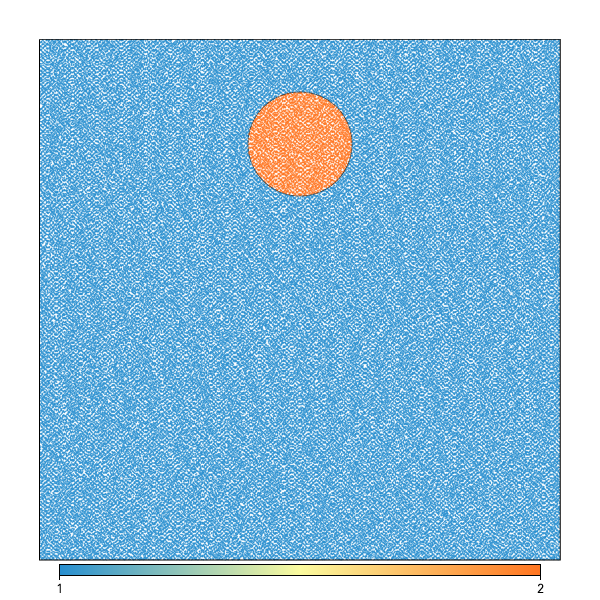

In [9]:
Fig = glucifer.Figure(figsize=(600,600))
Fig.Points(ball_contour, size=10.0, colour="k")
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.save("Figure_3.png")
Fig.show()

In [10]:
tracker = {"time":[],
           "ypos":[]}

def record_position():
    time = Model.time
    ypos = tipTracker.particleCoordinates.data[:,1][0]
    tracker["time"].append(time)
    tracker["ypos"].append(ypos)
    
Model.post_solve_functions["tip"] = record_position

In [11]:
Model.init_model()

In [12]:
Model.run_for(nstep=40, checkpoint_interval=1)

Running with UWGeodynamics version 2.8.1-dev-d0ac155(master)
Options:  -ksp_type bsscr -ksp_k2_type NULL -pc_type none -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -Q22_pc_type uw -rescale_equations False -A11_ksp_rtol 1e-06 -A11_ksp_type fgmres -scr_ksp_rtol 1e-05 -scr_ksp_type fgmres
Step:     1 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:47)
Step:     2 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:49)
Step:     3 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:52)
Step:     4 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:54)
Step:     5 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:56)
Step:     6 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:55:59)
Step:     7 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:56:01)
Step:     8 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:56:04)
Step:     9 Model Time: 0.0 second dt: 0.0 second (2019-09-23 00:56:0

1


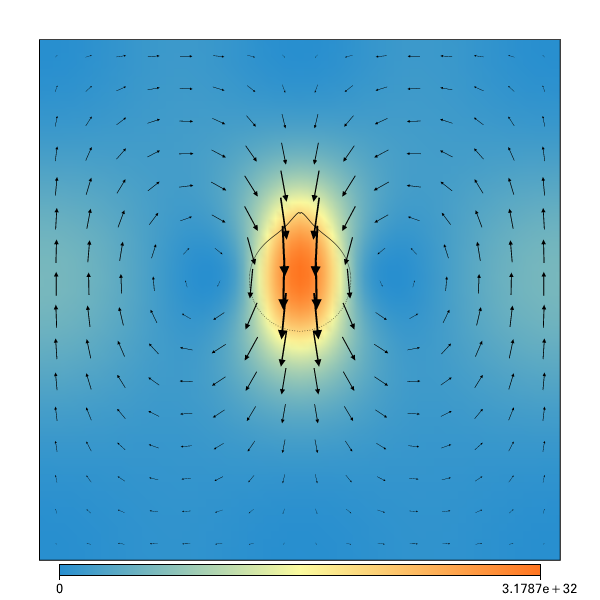

In [13]:
import underworld.function as fn
# Calculate the velocity magnitude
velocityMag = fn.math.dot(Model.velocityField, Model.velocityField)

Fig = glucifer.Figure(figsize=(600,600))
Fig.Points(ball_contour, colour="k")
Fig.Surface(Model.mesh, velocityMag)
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_3.png")
Fig.show()

In [20]:
tipTracker.particleCoordinates.data[0][1]

-0.060362264249827137

In [15]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


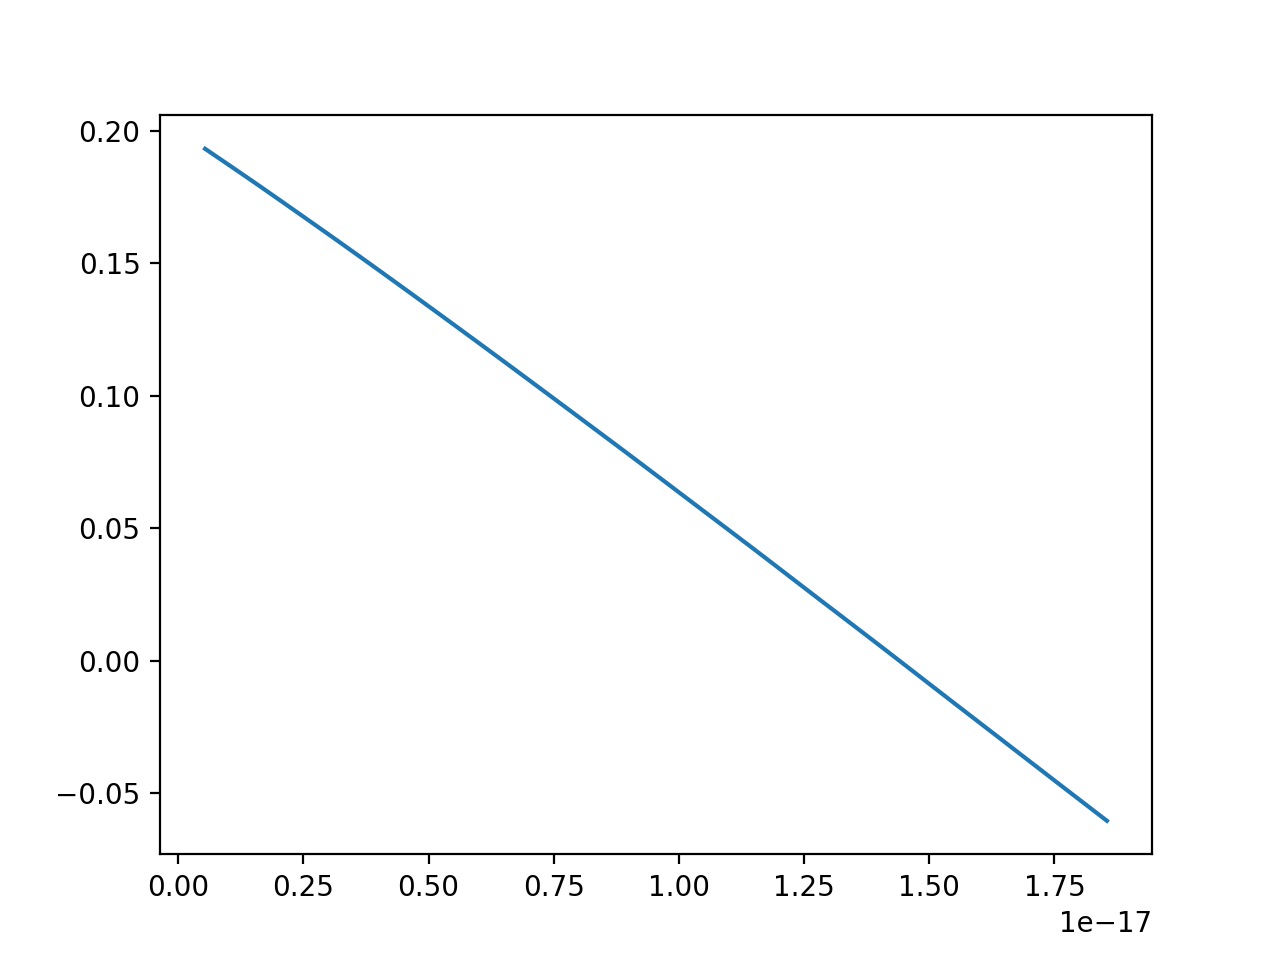

In [17]:
time = [val.magnitude for val in tracker["time"]]
ypos = tracker["ypos"]

plt.plot(time, ypos)
plt.show()